In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
df= pd.read_csv('C:\\Users\\91875\\Documents\\Flight.csv')
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [3]:
df=df.drop('Unnamed: 0', axis=1)
df=df.drop('flight', axis=1)
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [4]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [5]:
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

1. Number of passengers per airline

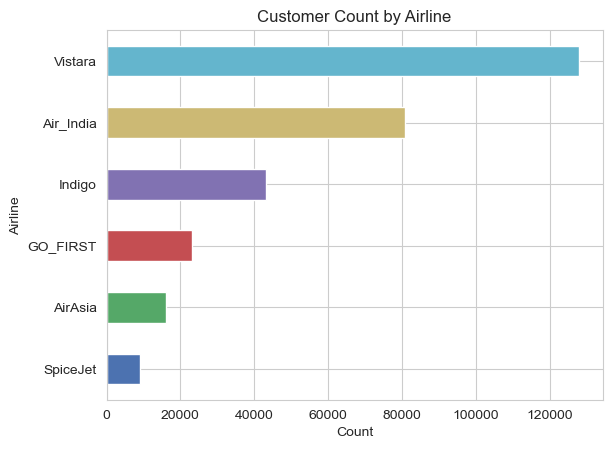

In [6]:
airline_counts = df['airline'].value_counts().sort_values(ascending=True)
sns.set_style("whitegrid")
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD']

# Create horizontal bar chart of airline counts
airline_counts.plot(kind='barh', color=colors)
plt.title("Customer Count by Airline")
plt.xlabel("Count")
plt.ylabel("Airline")
plt.show()

2. Average ticket price for each airline

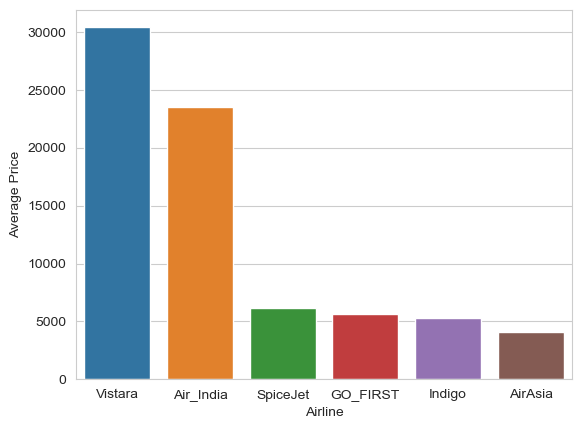

In [7]:
avg_price = df.groupby('airline')['price'].mean().reset_index()
avg_price = avg_price.sort_values(by='price',ascending=False)
sns.barplot(x='airline', y='price', data=avg_price)

plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.show()

3. Number of passengers in Business and Economy Class

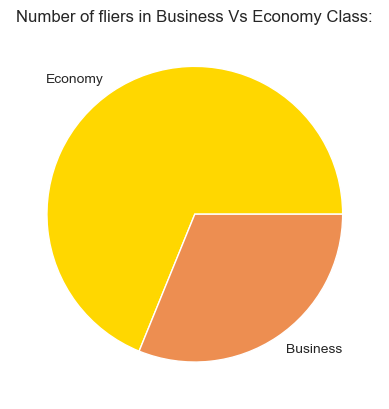

In [8]:
class_counts = df['class'].value_counts()
colors = ['#FFD700', '#ed8e51']
class_counts.plot(kind='pie', colors=colors)
plt.title("Number of fliers in Business Vs Economy Class:")
plt.ylabel('')
plt.show()

4. Ticket prices based on class

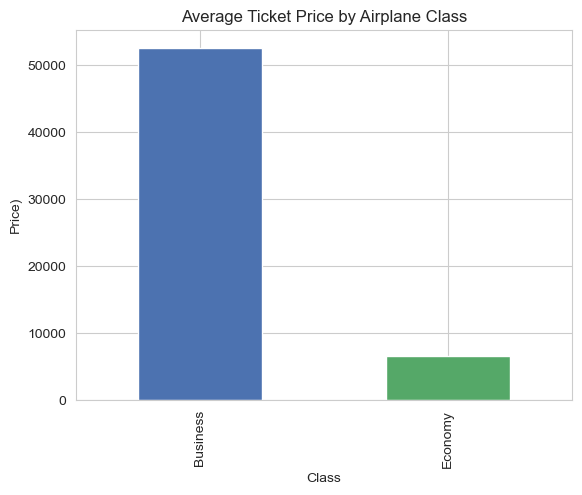

In [9]:
class_prices = df.groupby('class')['price'].mean()
sns.set_style("whitegrid")
class_prices.plot(kind='bar', color=['#4C72B0', '#55A868'])
plt.title("Average Ticket Price by Airplane Class")
plt.xlabel("Class")
plt.ylabel("Price)")
plt.show()

5. Ticket prices based on duration of flight

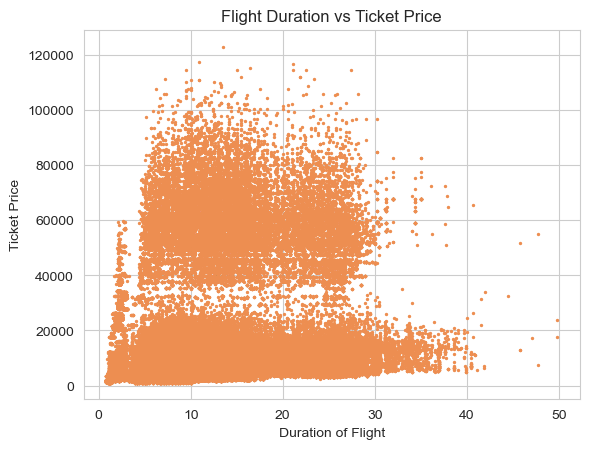

In [10]:
plt.scatter(df['duration'], df['price'], s=2, color= '#ed8e51')

plt.title("Flight Duration vs Ticket Price")
plt.xlabel("Duration of Flight")
plt.ylabel("Ticket Price")
plt.show()

Identifying the categorical features:

In [11]:
cat_cols = list(df.select_dtypes(include=['object']).columns)
print(f"Number of categorical columns: {len(cat_cols)}")
print(f"Categorical columns:\n{cat_cols}")

Number of categorical columns: 7
Categorical columns:
['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']


In [14]:
import category_encoders as ce

te = ce.TargetEncoder(cols=cat_cols)
df = te.fit_transform(df, df['price'])
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,6179.278881,18951.326639,21232.361894,9375.938535,21586.758341,21372.529469,6572.342383,2.17,1,5953
1,6179.278881,18951.326639,20370.676718,9375.938535,22231.076098,21372.529469,6572.342383,2.33,1,5953
2,4091.072742,18951.326639,20370.676718,9375.938535,14993.139521,21372.529469,6572.342383,2.17,1,5956
3,30396.536302,18951.326639,21630.760254,9375.938535,18494.598993,21372.529469,6572.342383,2.25,1,5955
4,30396.536302,18951.326639,21630.760254,9375.938535,22231.076098,21372.529469,6572.342383,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,30396.536302,21995.339871,21630.760254,22900.992482,23044.371615,20427.661284,52540.081124,10.08,49,69265
300149,30396.536302,21995.339871,18179.203331,22900.992482,21586.758341,20427.661284,52540.081124,10.42,49,77105
300150,30396.536302,21995.339871,20370.676718,22900.992482,21586.758341,20427.661284,52540.081124,13.83,49,79099
300151,30396.536302,21995.339871,20370.676718,22900.992482,23044.371615,20427.661284,52540.081124,10.00,49,81585


Identifying numerical columns

In [15]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(numeric_cols)

['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left', 'price']


In [16]:
#MISSING VALUES
features_with_na = [col for col in df.columns if df[col].isna().sum() > 0]

missing_values_df = pd.DataFrame(df[features_with_na].isnull().mean().sort_values(ascending=False), columns=["percentage"])
missing_values_df.head(10)

,percentage


In [17]:
# Min Max Scaler: transformation of data

names = df.columns
indexes = df.index
sc = MinMaxScaler((0, 1)) #between 0 and 1 range
df = sc.fit_transform(df)
data_scaled = pd.DataFrame(df, columns=names, index=indexes)
data_scaled.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0.079383,0.0,0.867088,0.0,0.876048,0.833363,0.0,0.027347,0.0,0.039749
1,0.079383,0.0,0.804496,0.0,0.930839,0.833363,0.0,0.030612,0.0,0.039749
2,0.000000,0.0,0.804496,0.0,0.315340,0.833363,0.0,0.027347,0.0,0.039773
3,1.000000,0.0,0.896027,0.0,0.613097,0.833363,0.0,0.028980,0.0,0.039765
4,1.000000,0.0,0.896027,0.0,0.930839,0.833363,0.0,0.030612,0.0,0.039765


Setting our target variables:

In [18]:
# Set 'price' as the target variable
y = data_scaled['price']

# Extract the input features
X_data = data_scaled.drop(['price'], axis=1)

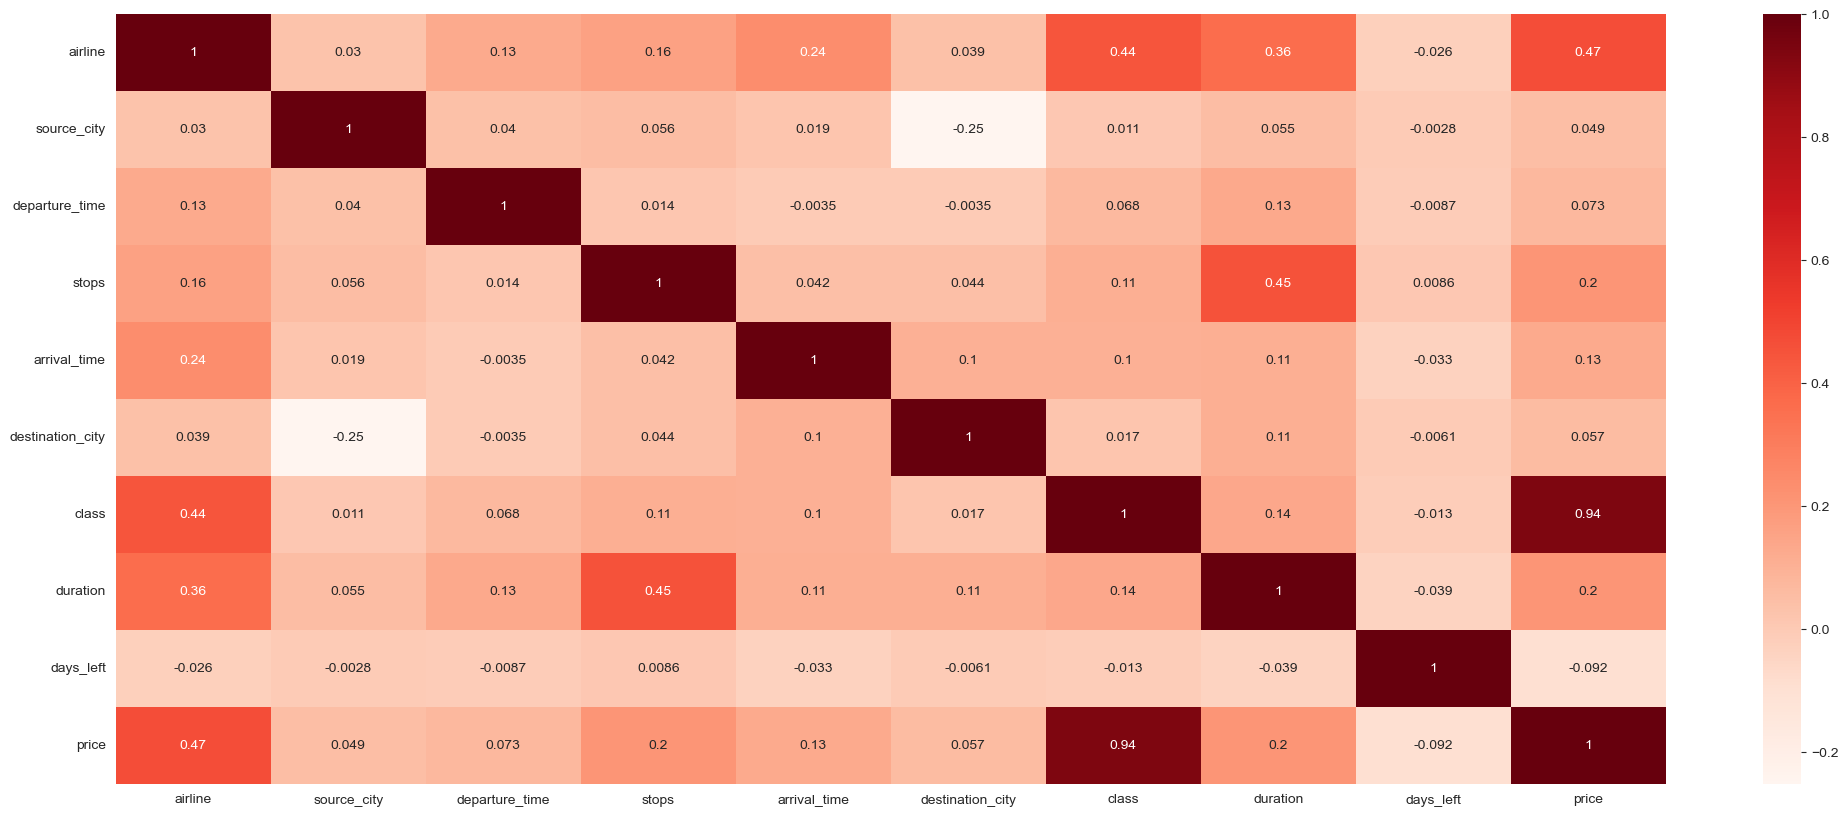

In [19]:
#Using Pearson Correlation
plt.figure(figsize=(25,10))
cor = data_scaled.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [20]:
#Correlation with target variable price
cor_target = abs(cor["price"])

relevant_features = cor_target
relevant_features

airline             0.471865
source_city         0.049099
departure_time      0.072732
stops               0.203405
arrival_time        0.128853
destination_city    0.056619
class               0.937860
duration            0.204222
days_left           0.091949
price               1.000000
Name: price, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split 

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


lr = LinearRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)

#make predictions
y_pred = lr.predict(X_test)

# Evaluate the model on the testing data
score = lr.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Accuracy of model :", score)
print("Mean squared error:", mse)
print("R-squared:", r2)

Accuracy of model : 0.902090866012934
Mean squared error: 0.0033928087752166376
R-squared: 0.902090866012934


In [25]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=5, min_samples_split=10)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

dt_score = dt.score(X_test, y_test)
dt_mse = mean_squared_error(y_test, y_pred)
dt_r2 = r2_score(y_test, y_pred)

print("Accuracy of model :", dt_score)
print("Mean squared error:", dt_mse)
print("R-squared:", dt_r2)

Accuracy of model : 0.9429807031575439
Mean squared error: 0.0019758684691187577
R-squared: 0.9429807031575439


In [26]:
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

rf_score = rf.score(X_test, y_test)
rf_mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

print("Accuracy of model :", rf_score)
print("Mean squared error:", rf_mse)
print("R-squared:", rf_r2)

Accuracy of model : 0.9648658720149964
Mean squared error: 0.001217489859044729
R-squared: 0.9648658720149964


From the above used ML models we have gone through the RandomForest regressor,Decision Tree Regressor, Linear Regressor.

Among these three models Random Forest Regressor has given highest accuracy for prediction